In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [8]:
fake_news_df = pd.read_csv('C:\\Users\dell\\Downloads\\fake.csv')
real_news_df = pd.read_csv('C:\\Users\\dell\\Downloads\\true.csv')


In [9]:
# Add labels to the datasets
fake_news_df['label'] = 0  # Fake news labeled as 0
real_news_df['label'] = 1  # Real news labeled as 1


In [11]:
 #Combine the datasets
df = pd.concat([fake_news_df, real_news_df])

# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

# Display dataset information
df.info()

# Display first 5 records
df.head()

# Check for null values
df.isnull().sum()

# Dropping rows with missing values (if any)
df = df.dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


Accuracy: 98.94%

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7106
           1       0.99      0.99      0.99      6364

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



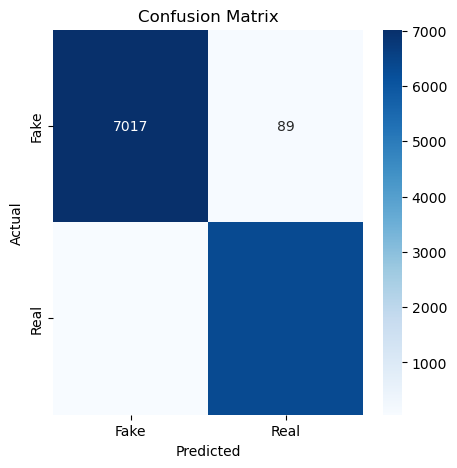

In [13]:
# Function to clean text data
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in square brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text  # Corrected the typo here

# Apply text cleaning
df['text'] = df['text'].apply(lambda x: clean_text(str(x)))

# Check cleaned text data
df['text'].head()

# Split the data into features and labels
X = df['text']  # Features (news content)
y = df['label']  # Target (real or fake)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
# Train a Logistic Regression classifier
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()